(70000, 28, 28)
(28, 28)
float64
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         

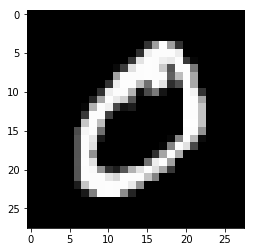

In [3]:
def generator_tan(noise, reuse_vars=None):
    with tf.variable_scope("gen", reuse=reuse_vars):
        # First DenseLayer
        dense = tf.layers.dense(inputs=noise, units=3136, activation=tf.nn.relu, name="dense")
        

        #Reshape
        reshape = tf.reshape(dense, [-1, 56, 56, 1], name="reshape")


        #1 Conv2d
        conv1 = tf.layers.conv2d(inputs=reshape, filters=50, kernel_size=[3,3], strides=2, padding="same", activation=tf.nn.relu, name="conv1")

        #BatchNormalization
        conv1_norm = tf.layers.batch_normalization(conv1, name="batch_norm1")

        #Upsample
        conv1_upsample = tf.image.resize_images(conv1_norm, (56,56))


        #2 Conv2d
        conv2 = tf.layers.conv2d(inputs=conv1_upsample, filters=25, kernel_size=[3,3], strides=2, padding="same", activation=tf.nn.relu, name="conv2")

        #BatchNormalization
        conv2_norm = tf.layers.batch_normalization(conv2, name="batch_norm2")

        #Upsample
        conv2_upsample = tf.image.resize_images(conv2_norm, (56,56))


        #2 Conv2d
        output = tf.layers.conv2d(inputs=conv2_upsample, filters=1, kernel_size=[3,3], strides=2, padding="same", activation=tf.nn.tanh, name="conv3")

        return output


In [18]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.8

In [19]:
from tqdm import tqdm_notebook

train = train.reshape(train.shape[0], 28, 28, 1).astype('float32')

train_dataset = tf.data.Dataset.from_tensor_slices(train).repeat().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

iterator = train_dataset.make_one_shot_iterator()

nextbatch = iterator.get_next()

init = tf.global_variables_initializer()



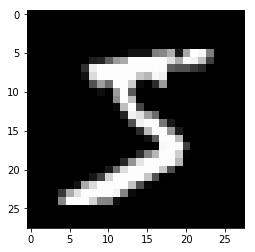

In [20]:
plt.imshow(train[0].reshape(28,28), cmap="gray")

In [21]:
with tf.Session(config=config) as sess:
    sess.run(init)
    
    for epoch in tqdm_notebook(range(EPOCHS)):
        
        num_batches = len(train) // BATCH_SIZE
        
        for batch in range(num_batches):
            
            batch_images = sess.run(nextbatch)
            
            #batch = mnist.train.next_batch(BATCH_SIZE)
            #batch_images = batch[0].reshape((BATCH_SIZE, 28,28))
            #batch_images = np.expand_dims(batch_images, axis=-1)
            
            #print(batch_images.shape)
            
            
            #batch_images = batch_images * 2 - 1  # Use for TANH to remap between -1 and 1
            
            
            batch_z = np.random.uniform(-1,1,size=(BATCH_SIZE,100))
            
            _ = sess.run(D_trainer, feed_dict={real_images:batch_images, z:batch_z})
            
            _ = sess.run(G_trainer, feed_dict={z:batch_z})
            
        print ("ON EPOCH {}".format(epoch))
        
        sample_z = np.random.uniform(-1,1,size=(1,100))
            
        gen_sample = sess.run(generator(z, reuse_vars=True), feed_dict={z: sample_z})
        
        samples.append(gen_sample)
        
        
        """if (epoch % 5 == 0):

            fig=plt.figure(figsize=(8, 8))
            
            for i in range(1,4):
                fig.add_subplot(1, 3, i)
                plt.imshow(samples[epoch+i].reshape(28,28), cmap='gray')
            plt.show()
            
            #plt.imshow(gen_sample.reshape(28,28), cmap="gray")
            #plt.show()
            
            """

ON EPOCH 0
ON EPOCH 1
ON EPOCH 2
ON EPOCH 3
ON EPOCH 4
ON EPOCH 5
ON EPOCH 6
ON EPOCH 7
ON EPOCH 8
ON EPOCH 9
ON EPOCH 10
ON EPOCH 11
ON EPOCH 12
ON EPOCH 13
ON EPOCH 14
ON EPOCH 15
ON EPOCH 16
ON EPOCH 17
ON EPOCH 18
ON EPOCH 19
ON EPOCH 20
ON EPOCH 21
ON EPOCH 22
ON EPOCH 23
ON EPOCH 24
ON EPOCH 25
ON EPOCH 26
ON EPOCH 27
ON EPOCH 28
ON EPOCH 29
ON EPOCH 30
ON EPOCH 31
ON EPOCH 32
ON EPOCH 33
ON EPOCH 34
ON EPOCH 35
ON EPOCH 36
ON EPOCH 37
ON EPOCH 38
ON EPOCH 39
ON EPOCH 40
ON EPOCH 41
ON EPOCH 42
ON EPOCH 43
ON EPOCH 44
ON EPOCH 45
ON EPOCH 46
ON EPOCH 47
ON EPOCH 48
ON EPOCH 49
ON EPOCH 50
ON EPOCH 51
ON EPOCH 52
ON EPOCH 53
ON EPOCH 54
ON EPOCH 55
ON EPOCH 56
ON EPOCH 57
ON EPOCH 58
ON EPOCH 59
ON EPOCH 60
ON EPOCH 61
ON EPOCH 62
ON EPOCH 63
ON EPOCH 64
ON EPOCH 65
ON EPOCH 66
ON EPOCH 67
ON EPOCH 68
ON EPOCH 69
ON EPOCH 70
ON EPOCH 71
ON EPOCH 72
ON EPOCH 73
ON EPOCH 74
ON EPOCH 75
ON EPOCH 76
ON EPOCH 77
ON EPOCH 78
ON EPOCH 79
ON EPOCH 80
ON EPOCH 81
ON EPOCH 82
ON EPOCH 83



> Print out all images saved in samples (hose include generated images and 2x batch images)

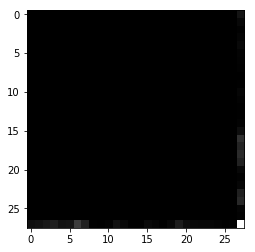

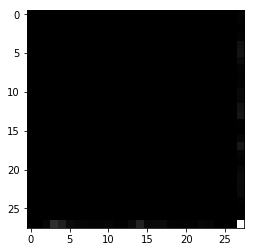

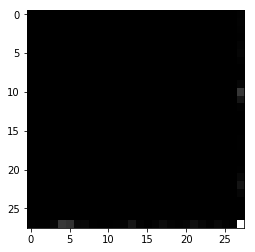

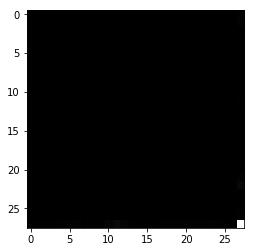

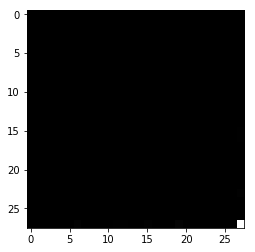

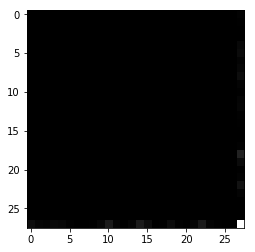

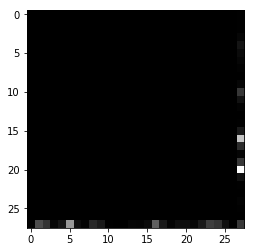

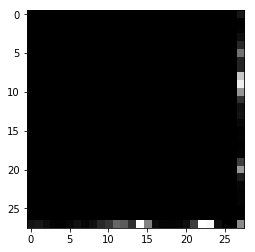

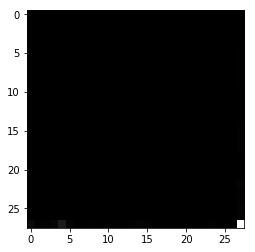

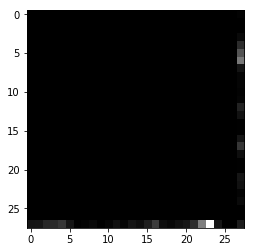

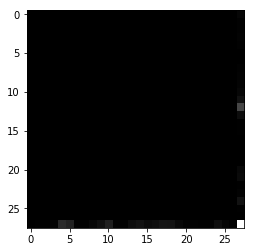

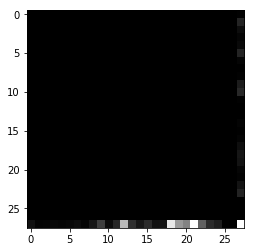

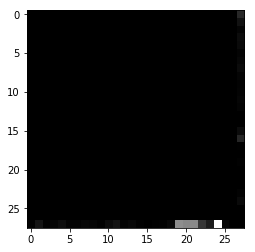

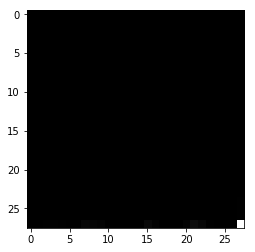

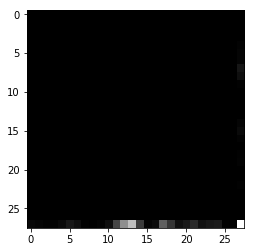

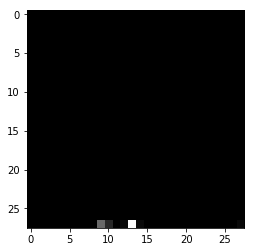

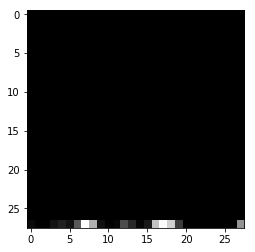

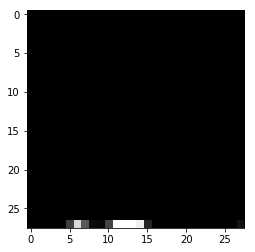

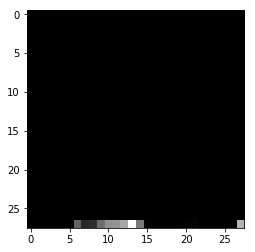

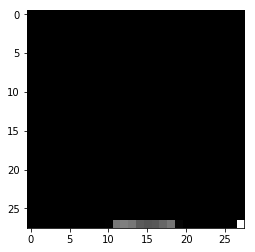

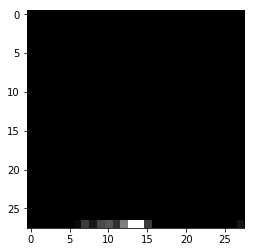

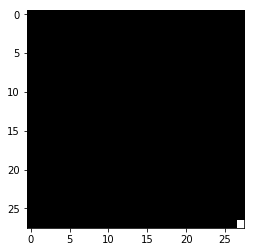

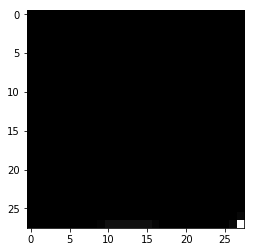

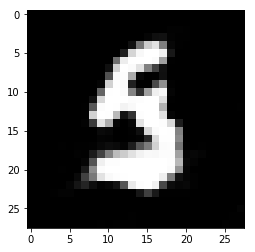

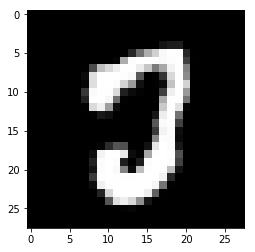

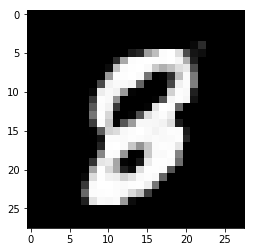

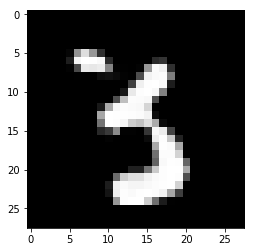

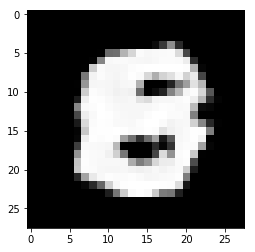

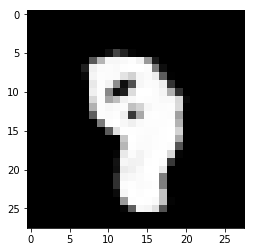

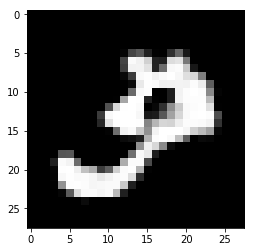

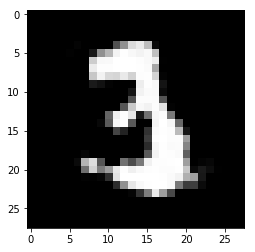

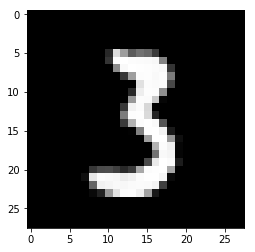

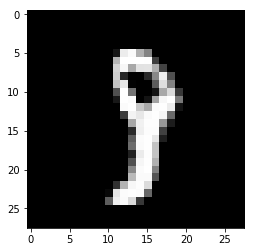

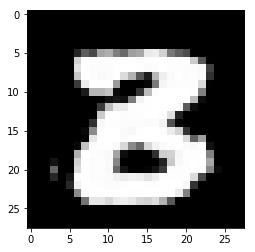

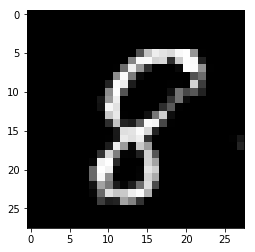

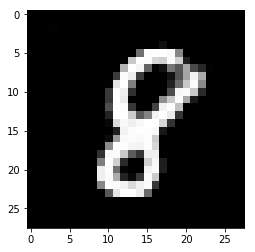

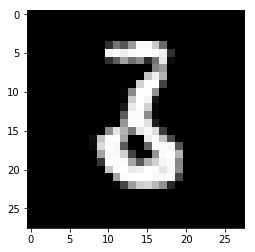

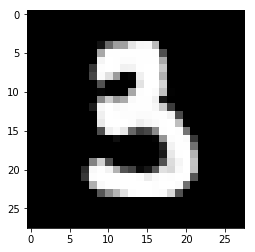

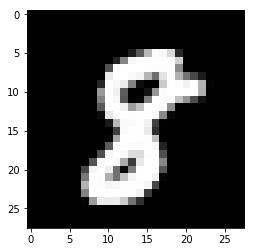

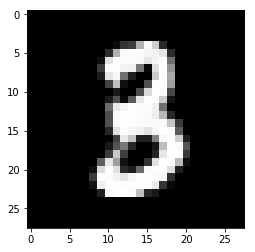

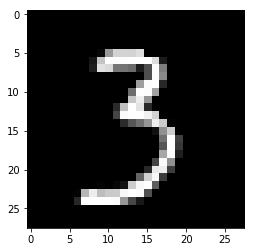

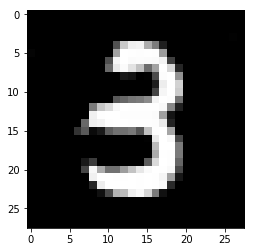

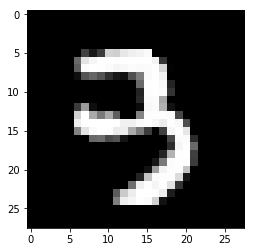

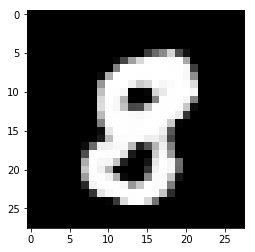

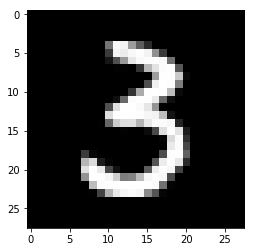

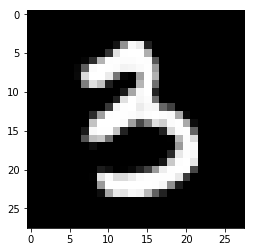

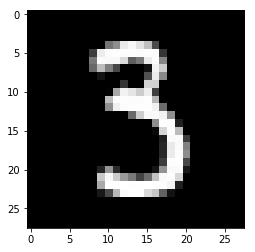

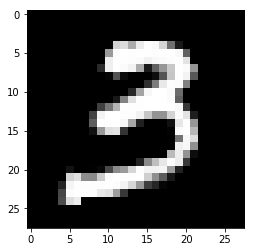

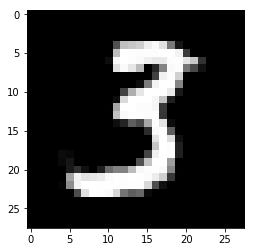

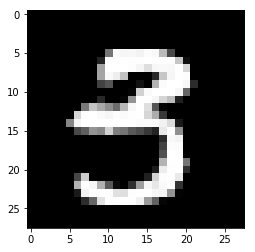

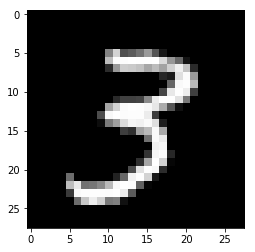

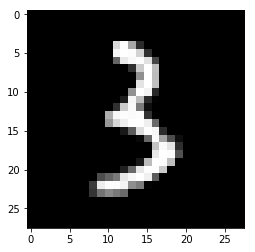

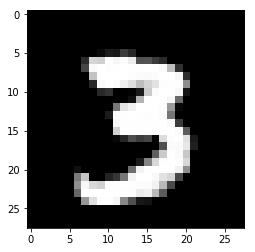

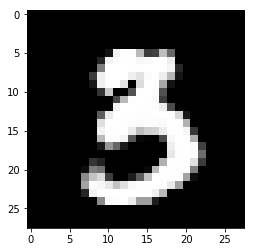

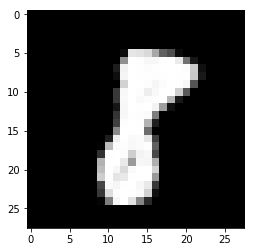

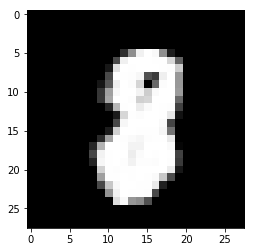

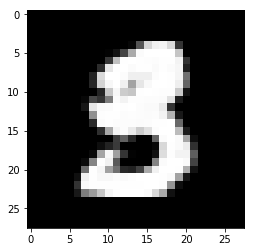

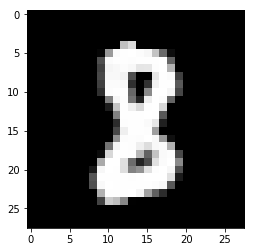

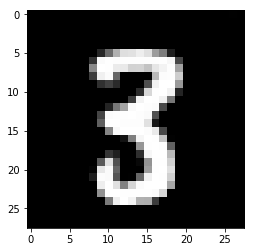

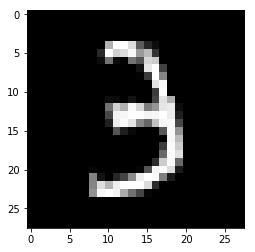

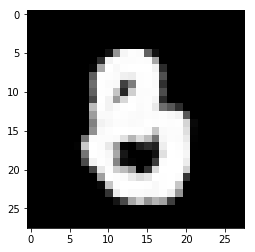

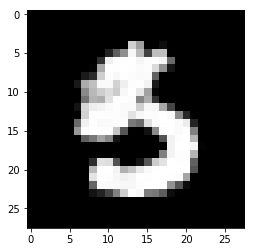

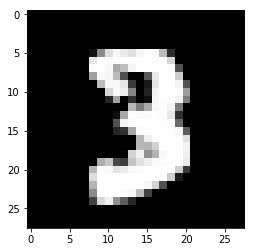

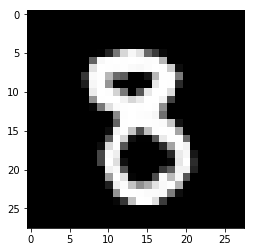

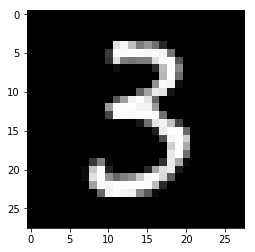

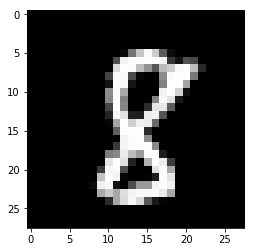

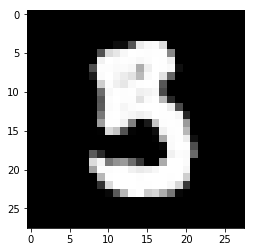

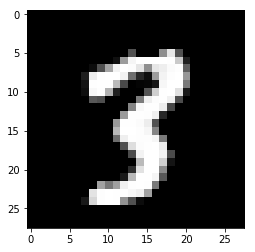

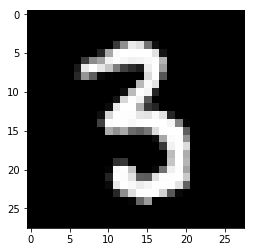

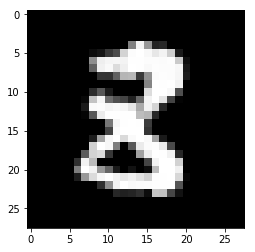

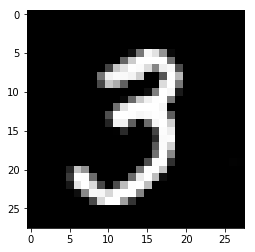

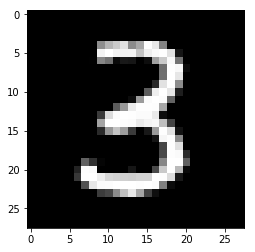

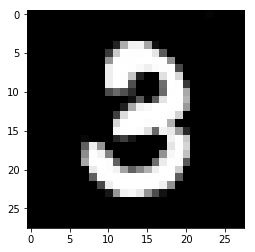

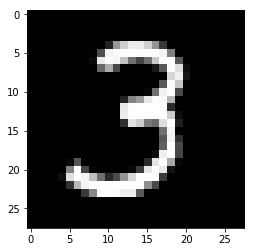

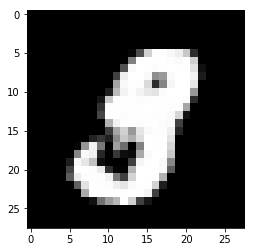

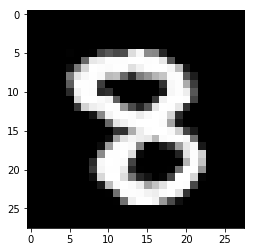

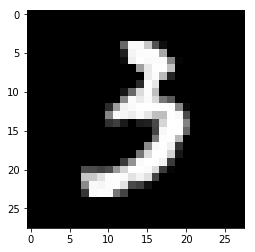

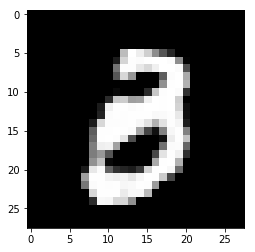

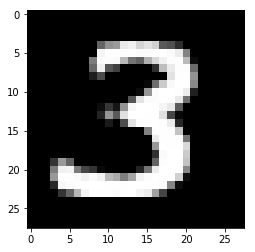

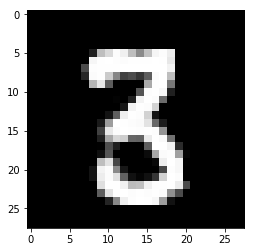

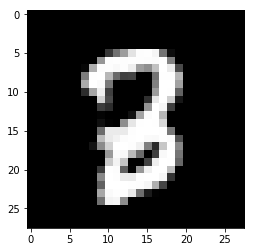

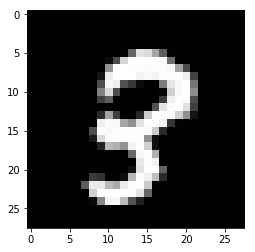

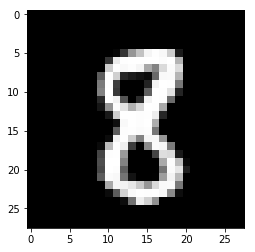

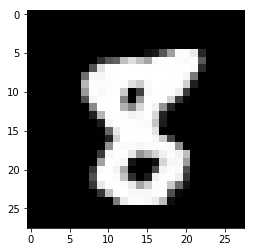

In [22]:
for index, img in enumerate(samples):
    
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.show()

> Print out all images of the last batch taken

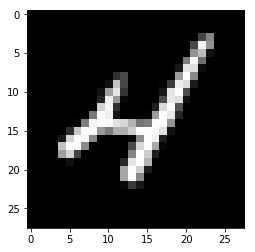

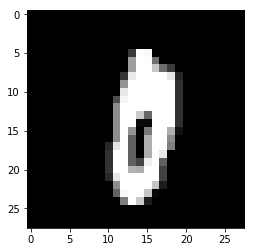

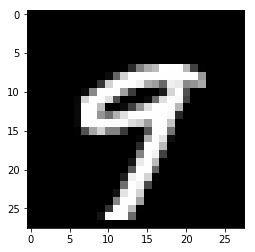

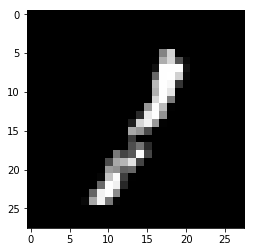

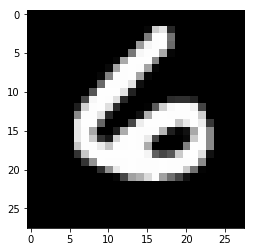

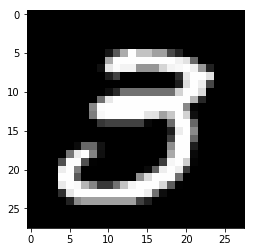

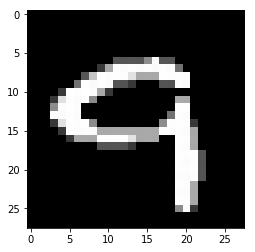

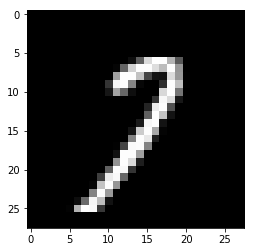

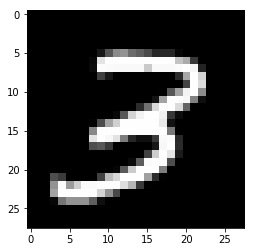

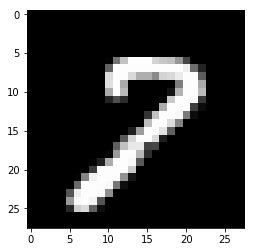

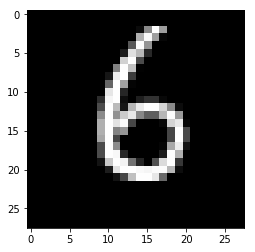

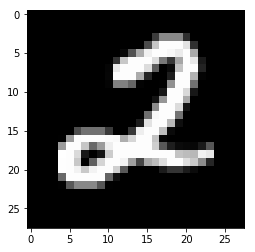

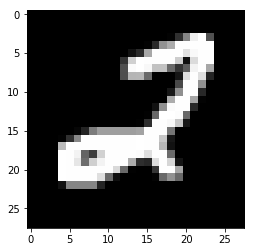

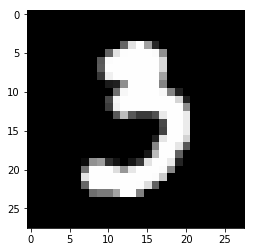

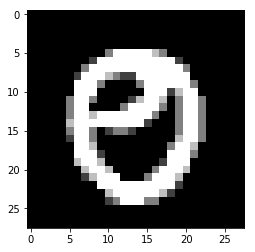

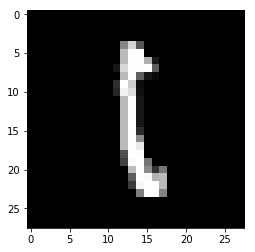

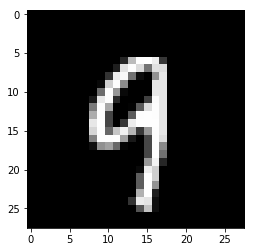

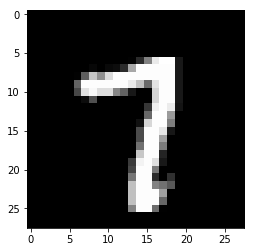

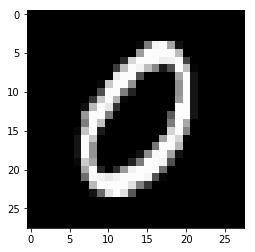

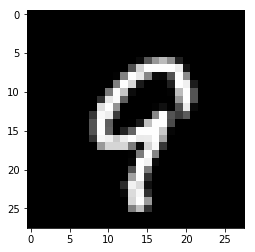

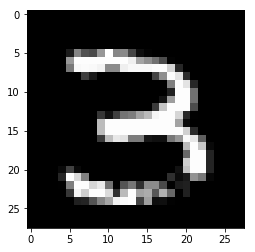

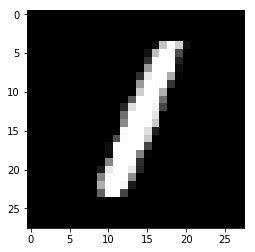

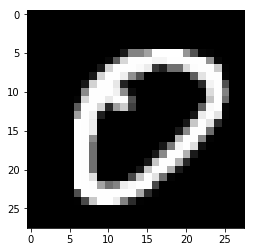

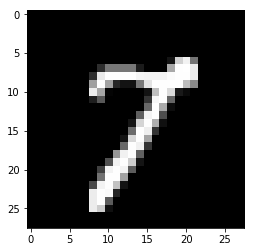

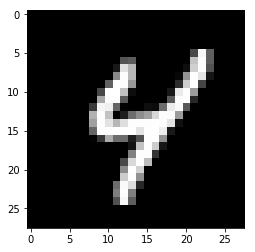

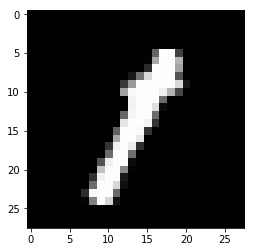

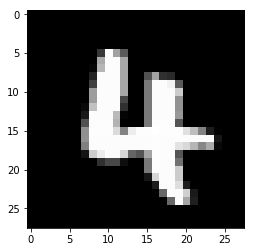

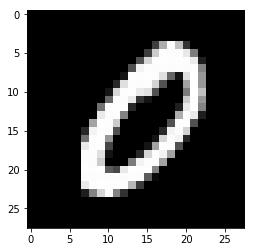

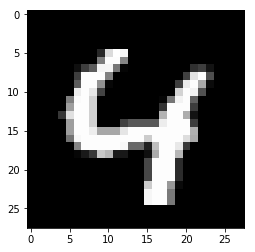

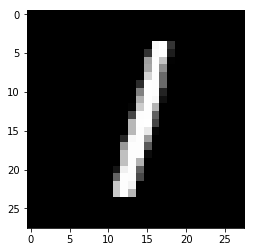

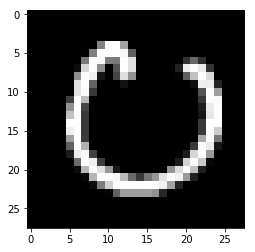

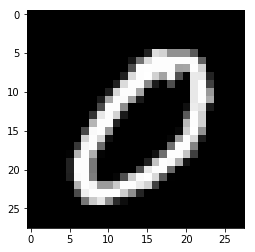

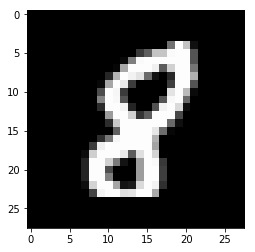

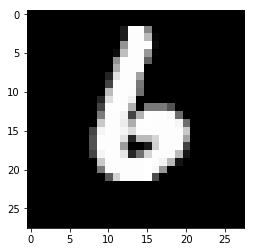

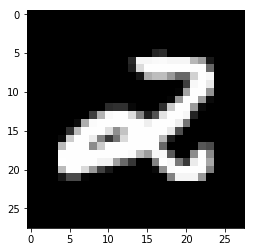

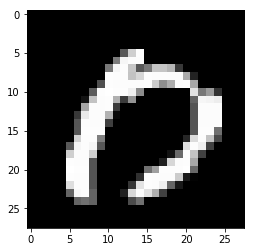

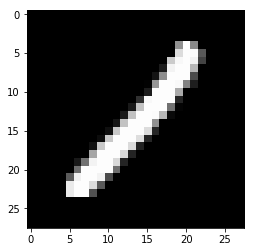

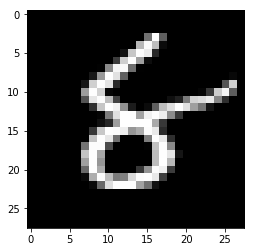

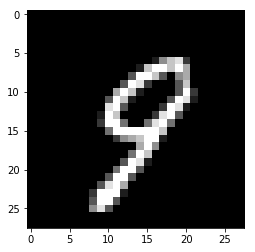

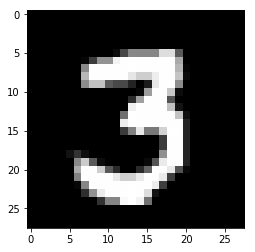

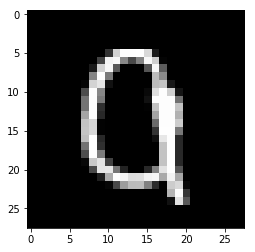

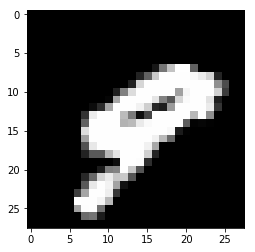

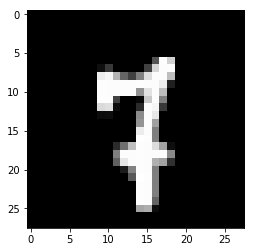

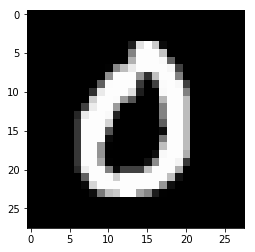

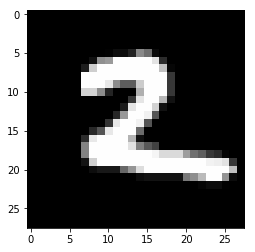

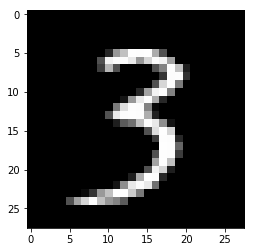

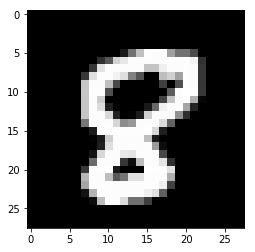

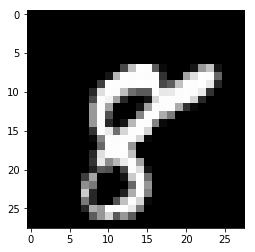

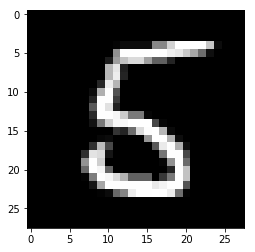

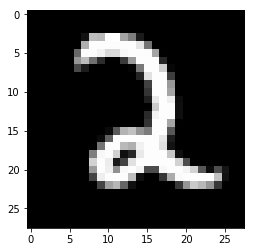

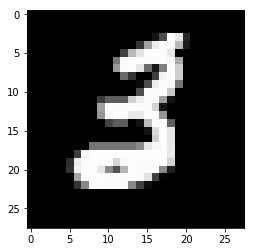

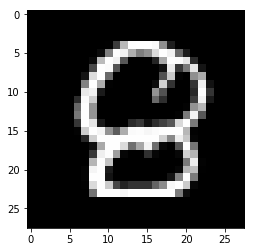

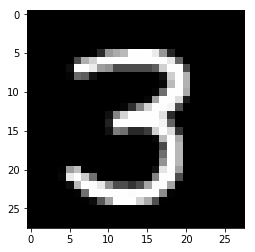

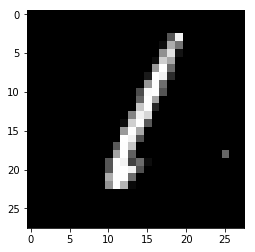

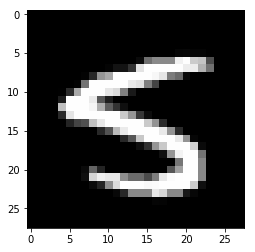

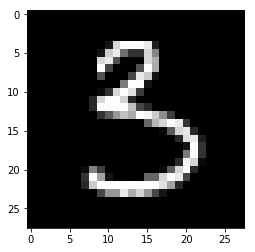

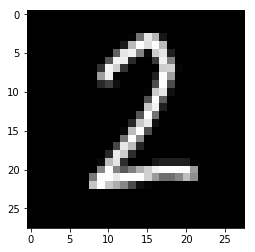

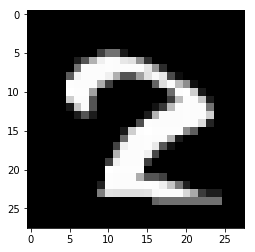

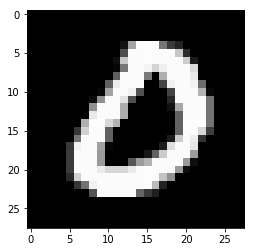

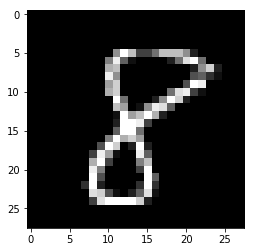

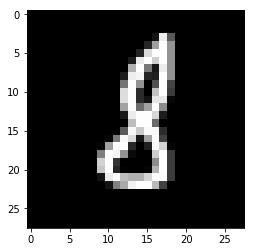

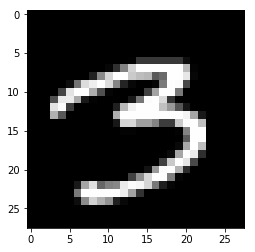

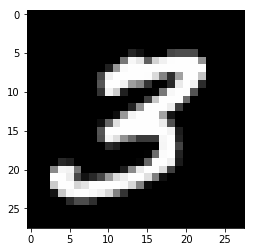

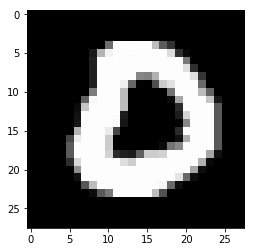

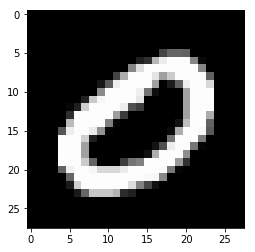

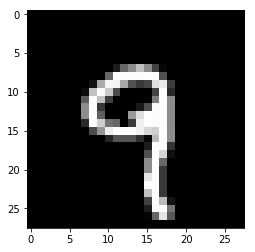

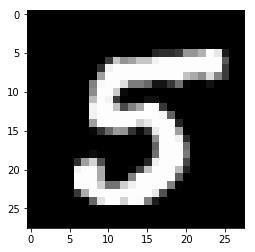

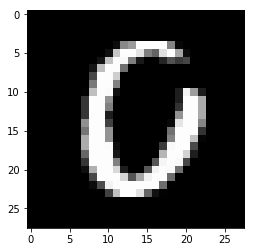

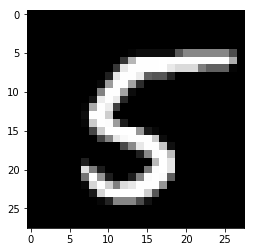

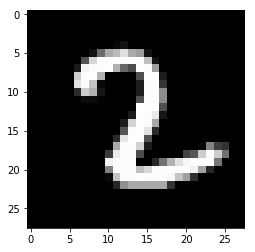

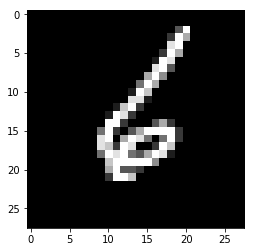

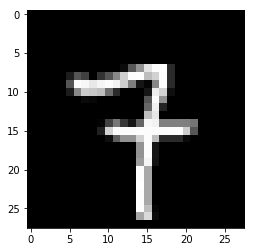

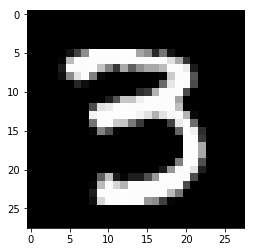

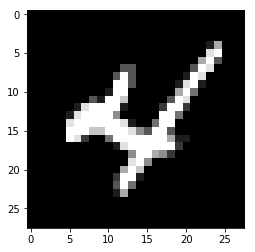

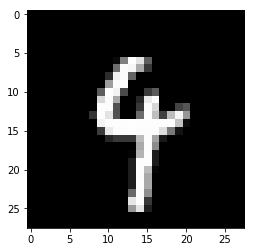

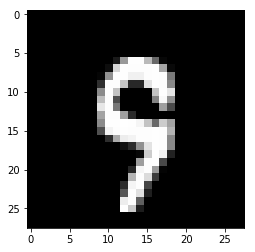

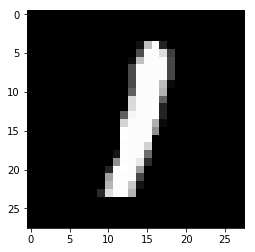

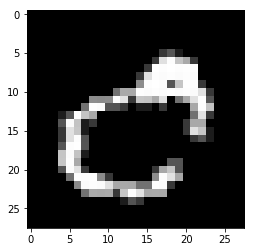

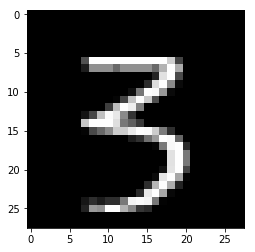

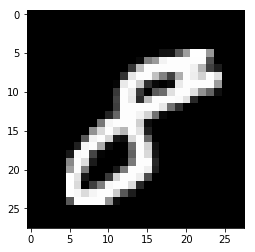

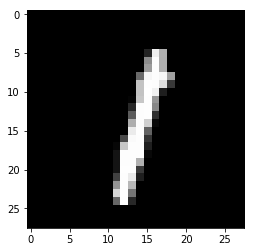

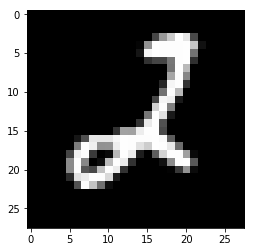

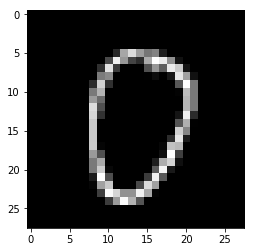

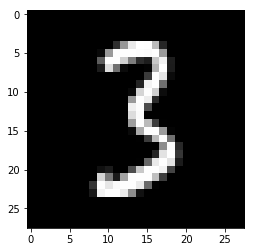

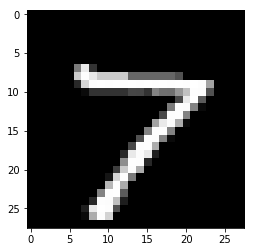

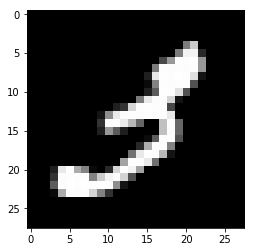

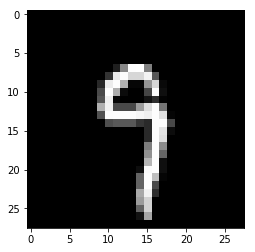

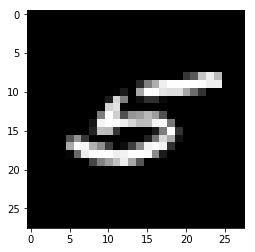

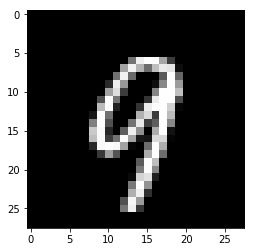

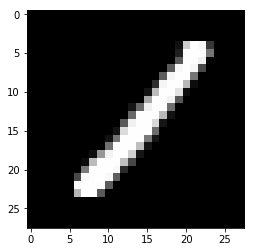

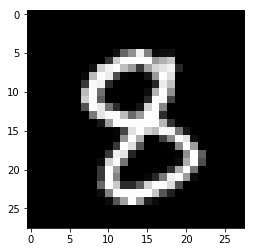

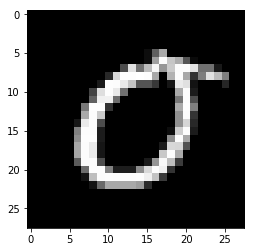

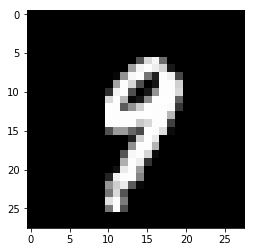

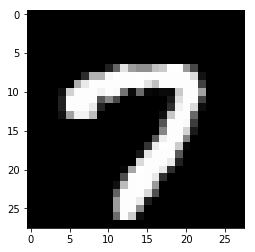

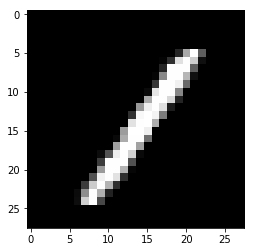

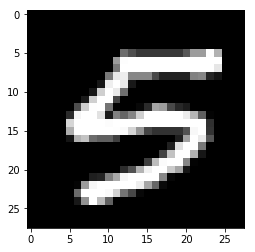

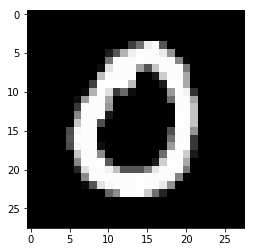

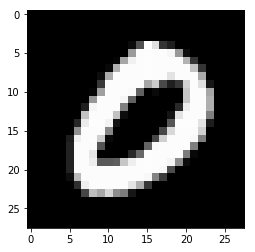

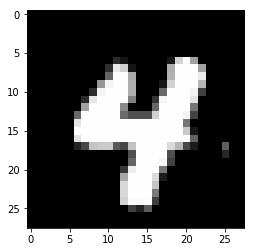

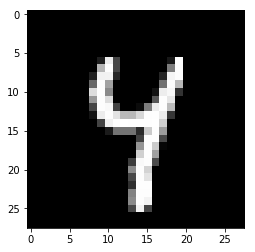

In [23]:
for batch in batch_images:
    plt.imshow(batch.reshape(28,28), cmap = 'gray')
    plt.show()

In [24]:
print(len(batch_images))

100


In [25]:
print(len(samples))

84
